## **How Does a Bike-Share Navigate Speedy Success?**

### Introduction
Welcome to the Cyclistic bike-share analysis case study! In this case study, you will perform many real-world tasks of a junior
data analyst. You will work for a fictional company, Cyclistic, and meet different characters and team members. In order to
answer the key business questions, you will follow the steps of the data analysis process: ask, prepare, process, analyze,
share, and act. Along the way, the Case Study Roadmap tables — including guiding questions and key tasks — will help you
stay on the right path.
By the end of this lesson, you will have a portfolio-ready case study. Download the packet and reference the details of this
case study anytime. Then, when you begin your job hunt, your case study will be a tangible way to demonstrate your
knowledge and skills to potential employers.

### Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

### About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.

### **Ask**

What is the problem you are trying to solve?

The main objective in this case is to discover how casual riders and Cyclistic members use their rental bikes differently and find the best marketing strategies to turn casual riders into annual members.



### **Prepare**

This project will use a dataset provided by Google: https://divvy-tripdata.s3.amazonaws.com/index.html

Download data and store it properly.

Data has been downloaded from https://divvy-tripdata.s3.amazonaws.com/index.html and locally saved on my computer.




### **Process**

Load the data, check for errors, clean and transform the data.

In [1]:

#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import style
style.use('fivethirtyeight')

import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"

In [6]:
#loading and merging the csv files and saving it as one file

df = pd.concat(map(pd.read_csv, ['202101-divvy-tripdata.csv', '202102-divvy-tripdata.csv', '202103-divvy-tripdata.csv', '202104-divvy-tripdata.csv',
'202105-divvy-tripdata.csv', '202106-divvy-tripdata.csv', '202107-divvy-tripdata.csv', '202108-divvy-tripdata.csv', '202109-divvy-tripdata.csv',
'202110-divvy-tripdata.csv', '202111-divvy-tripdata.csv', '202112-divvy-tripdata.csv']))

df.to_csv('merged_data.csv')

In [21]:
df = pd.read_csv('merged_data.csv')

In [11]:
df

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member
3,3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member
4,4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual
5595059,247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member
5595060,247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member
5595061,247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   ride_id             object 
 2   rideable_type       object 
 3   started_at          object 
 4   ended_at            object 
 5   start_station_name  object 
 6   start_station_id    object 
 7   end_station_name    object 
 8   end_station_id      object 
 9   start_lat           float64
 10  start_lng           float64
 11  end_lat             float64
 12  end_lng             float64
 13  member_casual       object 
dtypes: float64(4), int64(1), object(9)
memory usage: 597.6+ MB


In [25]:
#making a copy of the df incase I have to make changes later
df_copy = df.copy()

In [30]:
#Changing date columns format from string to datetime

df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5595063 entries, 0 to 5595062
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   start_station_name  object        
 6   start_station_id    object        
 7   end_station_name    object        
 8   end_station_id      object        
 9   start_lat           float64       
 10  start_lng           float64       
 11  end_lat             float64       
 12  end_lng             float64       
 13  member_casual       object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(7)
memory usage: 597.6+ MB


In [17]:
#checking for duplicate rows
df.duplicated().sum()

0

In [63]:
#extracting month and day of the week, creating trip_duration(in minutes) column

df['Month'] = df['started_at'].dt.month_name(locale= 'English')
df['Day'] = df['started_at'].dt.day_name()

df['trip_duration_m'] = ((pd.to_datetime(df['ended_at']) - 
                            pd.to_datetime(df['started_at']))
                                .astype('<m8[m]').astype(int))
                                
df


,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Month,Day,trip_duration_m
0,0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,January,Saturday,10
1,1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,January,Wednesday,4
2,2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,January,Thursday,1
3,3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,January,Thursday,11
4,4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,January,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5595058,247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,December,Sunday,19
5595059,247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,December,Monday,7
5595060,247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,December,Thursday,8
5595061,247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,December,Monday,14


### **Analyze and Visualize**

Analyzing and visualizing the data to gain insights


In [129]:
# Checking the average ride time by each day for members vs casual users
avg = df
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg['Day'] = pd.Categorical(avg['Day'], categories=cats, ordered=True)
avg = avg.sort_values('Day')
avg = df.groupby(['member_casual', 'Day'], as_index=False)[['trip_duration_m']].mean()


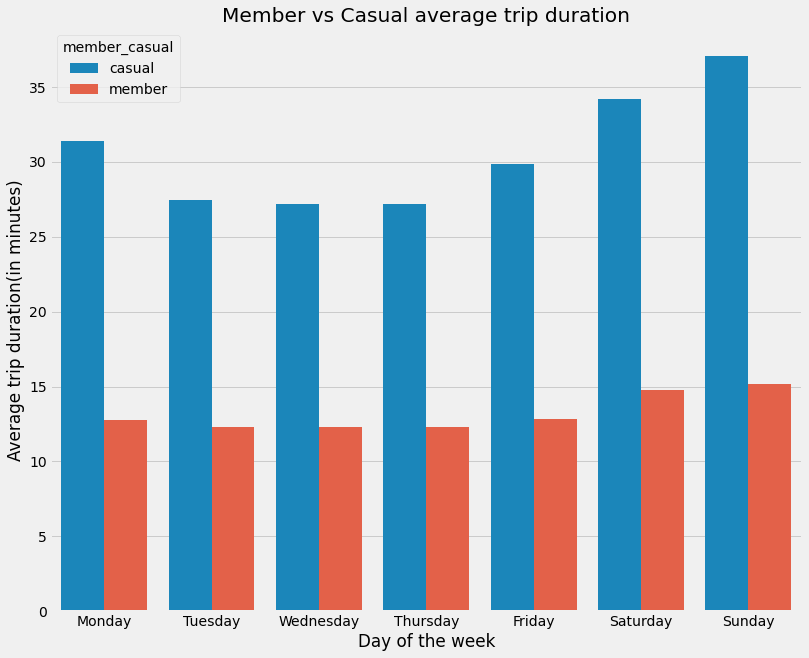

In [130]:
plt.figure(figsize= (12, 10))
sns.barplot(data=avg, x = 'Day', y = 'trip_duration_m', hue='member_casual')
plt.xlabel('Day of the week')
plt.ylabel('Average trip duration(in minutes)')
plt.title('Member vs Casual average trip duration');


In [131]:
#Checking the count of rides per day by members vs casual users
count = avg = df.groupby(['member_casual', 'Day'], as_index=False)[['trip_duration_m']].count()


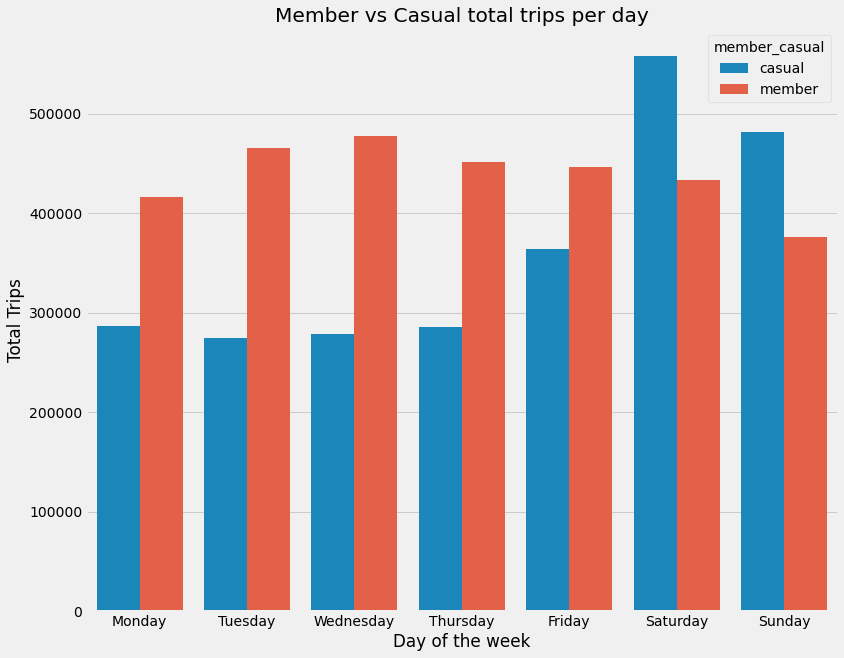

In [132]:
plt.figure(figsize= (12, 10))
sns.barplot(data=count, x = 'Day', y = 'trip_duration_m', hue='member_casual')
plt.xlabel('Day of the week')
plt.ylabel('Total Trips')
plt.title('Member vs Casual total trips per day');


In [133]:
# Checking the average ride time by each day for members vs casual users
avg_m = df
cats_m = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
avg_m['Month'] = pd.Categorical(avg_m['Month'], categories=cats_m, ordered=True)
avg_m = avg_m.sort_values('Month')
avg_m = df.groupby(['member_casual', 'Month'], as_index=False)[['trip_duration_m']].mean()


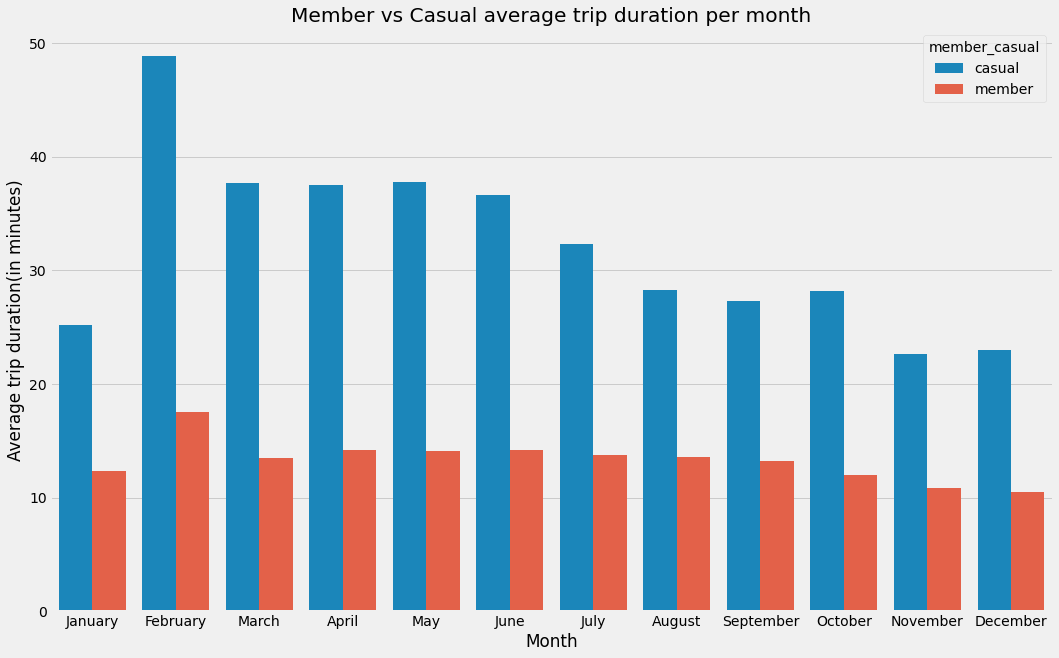

In [134]:
plt.figure(figsize= (16, 10))
sns.barplot(data=avg_m, x = 'Month', y = 'trip_duration_m', hue='member_casual')
plt.xlabel('Month')
plt.ylabel('Average trip duration(in minutes)')
plt.title('Member vs Casual average trip duration per month');

In [135]:
#Total number of rides by month
count_m = df.groupby(['member_casual', 'Month'], as_index=False)[['trip_duration_m']].count()


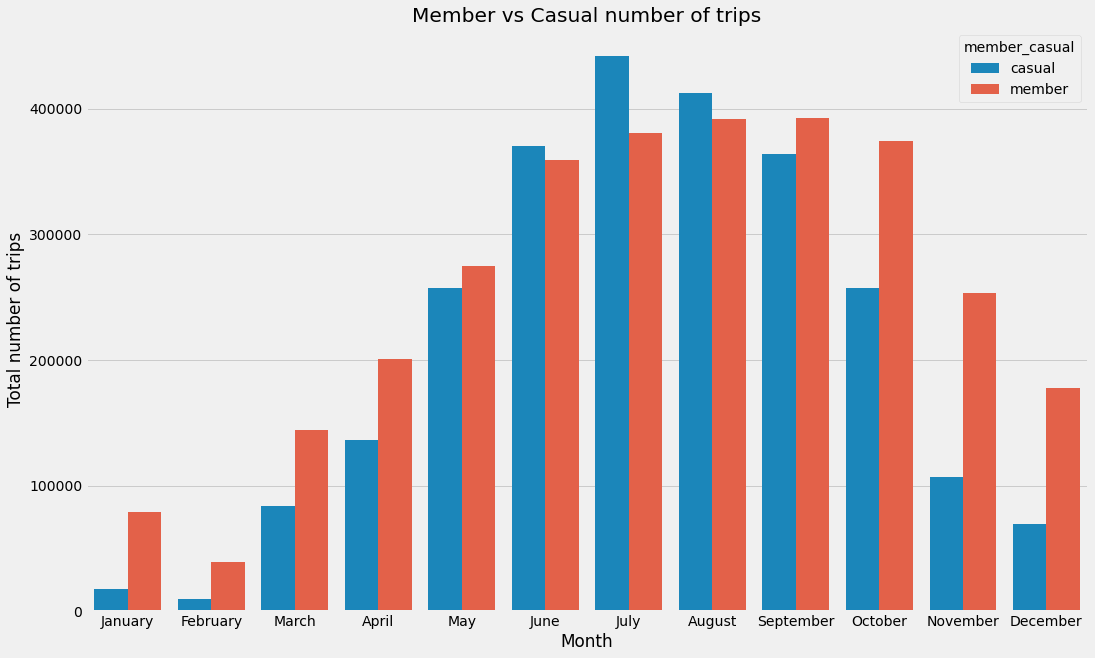

In [136]:
plt.figure(figsize= (16, 10))
sns.barplot(data=count_m, x = 'Month', y = 'trip_duration_m', hue='member_casual')
plt.xlabel('Month')
plt.ylabel('Total number of trips')
plt.title('Member vs Casual number of trips');

In [137]:
#What types of bikes are used the most?

bike_m = df[df.member_casual == 'member'].groupby(['rideable_type', 'Month'], as_index=False).count()
bike_c = df[df.member_casual == 'casual'].groupby(['rideable_type', 'Month'], as_index=False).count()

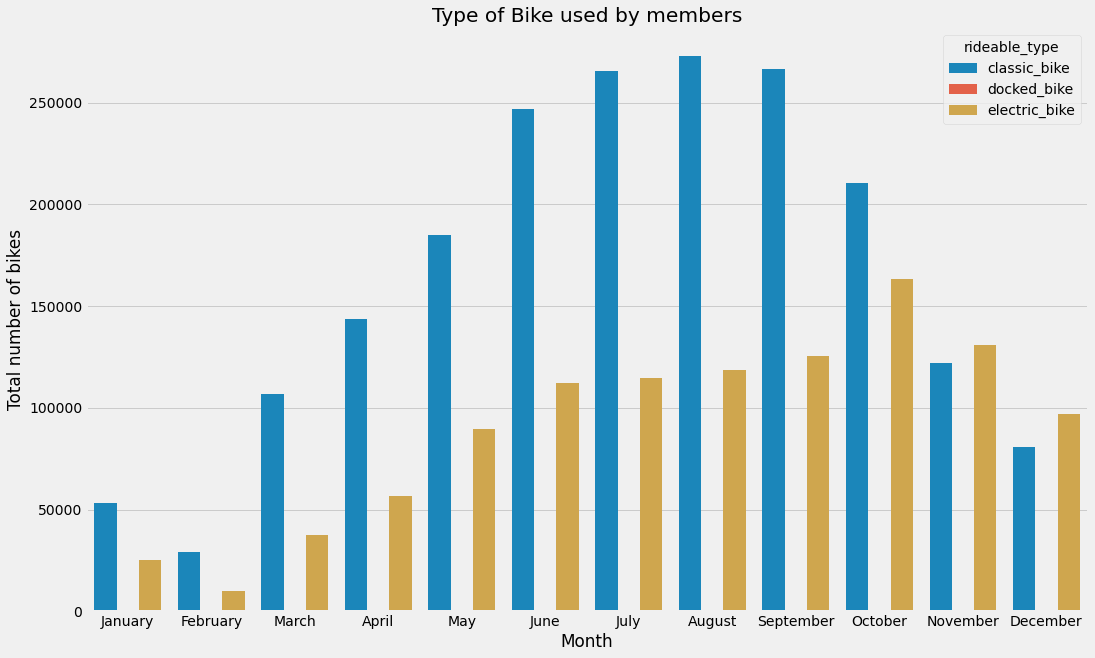

In [138]:
plt.figure(figsize= (16, 10))
sns.barplot(data=bike_m, x = 'Month', y = 'member_casual', hue='rideable_type')
plt.xlabel('Month')
plt.ylabel('Total number of bikes')
plt.title('Type of Bike used by members');

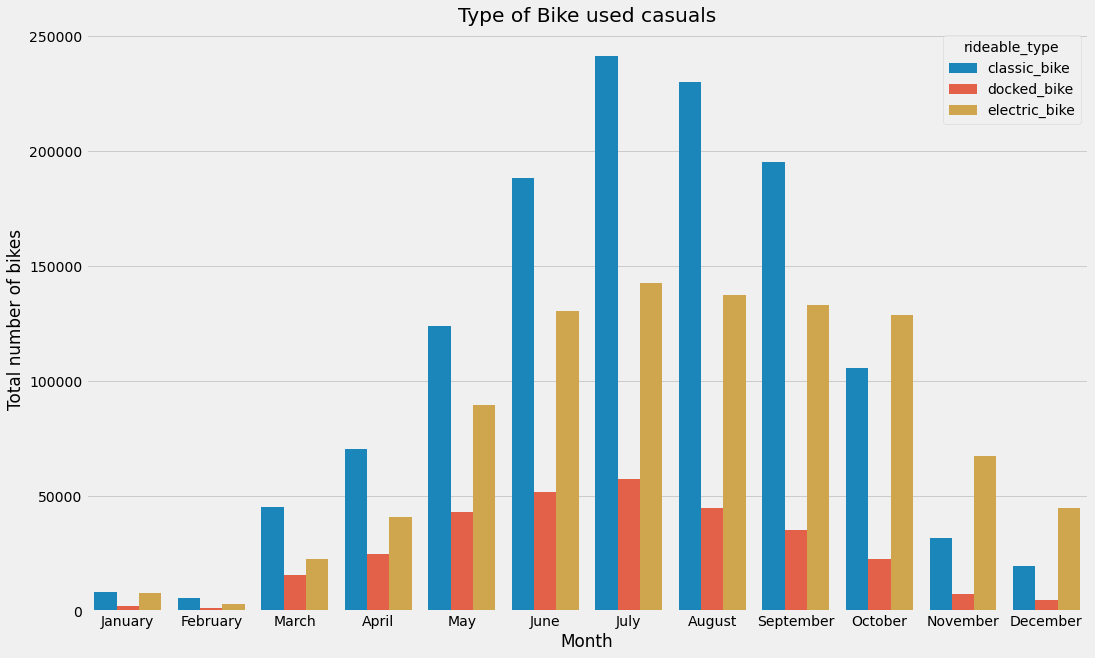

In [139]:
plt.figure(figsize= (16, 10))
sns.barplot(data=bike_c, x = 'Month', y = 'member_casual', hue='rideable_type')
plt.xlabel('Month')
plt.ylabel('Total number of bikes')
plt.title('Type of Bike used casuals');

In [166]:
pie = df[['rideable_type', 'ride_id']].groupby(['rideable_type'], as_index=False).count().rename(columns={'ride_id' : 'Count'})
pie

,rideable_type,Count
0,classic_bike,3251028
1,docked_bike,312343
2,electric_bike,2031692


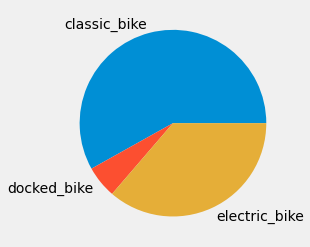

In [171]:
plt.pie(x = 'Count', labels='rideable_type', data=pie)
plt.show()

In [140]:
#Checking the average trip duration of members vs casuals

avg_c = df.groupby(['member_casual'])['trip_duration_m'].mean()
avg_c

member_casual
casual    31.511184
member    13.143485
Name: trip_duration_m, dtype: float64

In [160]:
#Number of trips by casuals vs members
count_t = df.groupby(['member_casual'])['trip_duration_m'].count()
count_t

member_casual
casual    2529005
member    3066058
Name: trip_duration_m, dtype: int64

In [154]:
#Let's check the top 10 start and end points
start_site = df.groupby(['start_station_name'], as_index=False)[['start_station_id']].count().rename(columns={'start_station_id' : 'Count'}).sort_values(['Count'], ascending=False).head(10)
end_site = df.groupby(['end_station_name'], as_index=False)[['end_station_id']].count().rename(columns={'end_station_id' : 'Count'}).sort_values(['Count'], ascending=False).head(10)
start_site


,start_station_name,Count
737,Streeter Dr & Grand Ave,82715
527,Michigan Ave & Oak St,44348
788,Wells St & Concord Ln,43610
533,Millennium Park,42223
152,Clark St & Elm St,41218
789,Wells St & Elm St,37690
740,Theater on the Lake,36840
404,Kingsbury St & Kinzie St,33581
159,Clark St & Lincoln Ave,33382
146,Clark St & Armitage Ave,32904


In [155]:
end_site 

,end_station_name,Count
735,Streeter Dr & Grand Ave,83390
526,Michigan Ave & Oak St,44834
786,Wells St & Concord Ln,43850
532,Millennium Park,42933
151,Clark St & Elm St,40531
787,Wells St & Elm St,37348
738,Theater on the Lake,37046
158,Clark St & Lincoln Ave,33295
771,Wabash Ave & Grand Ave,33132
403,Kingsbury St & Kinzie St,32951


In [156]:
start_site_m = df[df.member_casual == 'member'].groupby(['start_station_name'], as_index=False)[['start_station_id']].count().rename(columns={'start_station_id' : 'Count'}).sort_values(['Count'], ascending=False).head(10)
end_site_m = df[df.member_casual == 'member'].groupby(['end_station_name'], as_index=False)[['end_station_id']].count().rename(columns={'end_station_id' : 'Count'}).sort_values(['Count'], ascending=False).head(10)
start_site_m

,start_station_name,Count
151,Clark St & Elm St,24740
778,Wells St & Concord Ln,23718
401,Kingsbury St & Kinzie St,23565
779,Wells St & Elm St,21022
227,Dearborn St & Erie St,19585
782,Wells St & Huron St,19190
697,St. Clair St & Erie St,18903
60,Broadway & Barry Ave,17803
174,Clinton St & Madison St,16914
232,Desplaines St & Kinzie St,16823


In [157]:
end_site_m

,end_station_name,Count
149,Clark St & Elm St,24913
769,Wells St & Concord Ln,24393
396,Kingsbury St & Kinzie St,23647
770,Wells St & Elm St,21641
225,Dearborn St & Erie St,20303
688,St. Clair St & Erie St,18870
773,Wells St & Huron St,18828
60,Broadway & Barry Ave,18493
172,Clinton St & Madison St,17353
298,Green St & Madison St,17002


In [158]:
start_site_c = df[df.member_casual == 'casual'].groupby(['start_station_name'], as_index=False)[['start_station_id']].count().rename(columns={'start_station_id' : 'Count'}).sort_values(['Count'], ascending=False).head(10)
end_site_c = df[df.member_casual == 'casual'].groupby(['end_station_name'], as_index=False)[['end_station_id']].count().rename(columns={'end_station_id' : 'Count'}).sort_values(['Count'], ascending=False).head(10)
start_site_c

,start_station_name,Count
734,Streeter Dr & Grand Ave,66360
532,Millennium Park,33590
526,Michigan Ave & Oak St,29781
662,Shedd Aquarium,23251
737,Theater on the Lake,21351
784,Wells St & Concord Ln,19892
425,Lake Shore Dr & Monroe St,19617
159,Clark St & Lincoln Ave,17033
785,Wells St & Elm St,16668
360,Indiana Ave & Roosevelt Rd,16630


In [159]:
end_site_c

,end_station_name,Count
734,Streeter Dr & Grand Ave,68677
531,Millennium Park,34565
525,Michigan Ave & Oak St,31193
737,Theater on the Lake,22760
662,Shedd Aquarium,21564
783,Wells St & Concord Ln,19457
424,Lake Shore Dr & Monroe St,18264
425,Lake Shore Dr & North Blvd,17439
158,Clark St & Lincoln Ave,17180
769,Wabash Ave & Grand Ave,17097


### **Share**

Summary of key observations from above:

 - The Average ride duration of 30 minutes for casual rider is almost 2.5 times higher compared to that of member rider of 13 minutes.

 - On any day of the week, casuals ride 2x – 2.5x  longer than members.

 - Casuals rent more bikes on Saturdays and Sundays while members rent bikes on a more consistent basis throughout the entire week.

 - The total number of rides increases from June to September, for both casuals and members.

 - For both members and casuals, classic bike is the most popular choice followed by electric bike.

 - The top 10 routes start station and end station with maximum number of rides for both casual and member riders are different.

 - The top 10 routes start and end stations are same for casual riders.
 
 - The top 10 routes start and end stations are same for members.



### **Act**

My top three recommendations based on the analysis:

The number of casual rides increases from June to September, marketing team should focus on the top 10 stations during these months and advertise weekly, monthly and quaterly membership plans with a cut in price.

Most casual riders take longer rides on average, adjust the price based on trip duration: the longer the trip the higher the fee will be. Promote the membership plan to show the casuals how they will benefit from it and save more money.


Design a campaign to highlight the health and environmental benefits from the usage of bikes. Create a mobile application which can show how much calories an individual has burned by cycling.

